In [1]:
#Problem 4 Part 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn import metrics

In [2]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#List of variables that have string values
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Function (Yes = 1, No = 0)
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

#Applying function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

#Checking housing dataframe
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
from sklearn.preprocessing import StandardScaler
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].values
Y = housing.iloc[:, 0].values
#Standardization
X = StandardScaler().fit_transform(X)
X.shape, Y.shape

((545, 11), (545,))

In [5]:
#Split data 80:20
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
#Linear Support Vector Classifier
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear', C=1E6)
svr_poly = SVR(kernel='poly', C=1E6, degree=2)
svr_rbf = SVR(kernel='rbf', C=1E6, gamma=0.1)

y_lin = svr_linear.fit(X_train_pca, Y_train).predict(X_test_pca)
y_poly = svr_poly.fit(X_train_pca, Y_train).predict(X_test_pca)
y_rbf = svr_rbf.fit(X_train_pca, Y_train).predict(X_test_pca)

#summarize the fit of the model
print("Accuracy for linear:", svr_linear.score(X_test_pca, Y_test))
print("Accuracy for poly:", svr_poly.score(X_test_pca, Y_test))
print("Accuracy for rbf:", svr_rbf.score(X_test_pca, Y_test))

Accuracy for linear: 0.6476093961177557
Accuracy for poly: 0.32624247912716864
Accuracy for rbf: 0.6188735286364551


In [8]:
pca_val = []
acc_lin = []
acc_rbf = []
acc_poly = []

for i in range(2, 7):
    pca_val.append(i)
    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    svr_linear = SVR(kernel='linear', C=1E6)
    svr_poly = SVR(kernel='poly', C=1E6, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1E6, gamma=0.1)
    y_lin = svr_linear.fit(X_train_pca, Y_train).predict(X_test_pca)
    y_poly = svr_poly.fit(X_train_pca, Y_train).predict(X_test_pca)
    y_rbf = svr_rbf.fit(X_train_pca, Y_train).predict(X_test_pca)
    
    acc_lin.append(svr_linear.score(X_test_pca, Y_test))
    acc_rbf.append(svr_poly.score(X_test_pca, Y_test))
    acc_poly.append(svr_rbf.score(X_test_pca, Y_test))
    
    print("# of Components = ", i)
    #summarize the fit of the model
    print("Accuracy for linear:", svr_linear.score(X_test_pca, Y_test))
    print("Accuracy for poly:", svr_poly.score(X_test_pca, Y_test))
    print("Accuracy for rbf:", svr_rbf.score(X_test_pca, Y_test))

# of Components =  2
Accuracy for linear: 0.6476093961177557
Accuracy for poly: 0.32624247912716864
Accuracy for rbf: 0.6188735286364551
# of Components =  3
Accuracy for linear: 0.6526735339693401
Accuracy for poly: 0.33151162249869603
Accuracy for rbf: 0.6266325584648876
# of Components =  4
Accuracy for linear: 0.6501344289244093
Accuracy for poly: 0.2755365764485337
Accuracy for rbf: 0.6253958164404305
# of Components =  5
Accuracy for linear: 0.6495445310630754
Accuracy for poly: 0.2559451043618777
Accuracy for rbf: 0.6207416403469508
# of Components =  6
Accuracy for linear: 0.6493681688159463
Accuracy for poly: 0.4116235172014454
Accuracy for rbf: 0.628741136834887


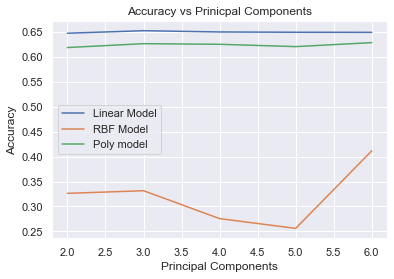

In [9]:
plt.plot(pca_val, acc_lin, label = 'Linear Model')
plt.plot(pca_val, acc_rbf, label = 'RBF Model')
plt.plot(pca_val, acc_poly, label = 'Poly model')
plt.xlabel("Principal Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prinicpal Components")
plt.legend()
plt.show()